# HT8. Redes Neuronales Artificiales

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor/tree/SVM)

## 1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [4]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3,
    "P": 2,
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)

## 2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

In [5]:
price_class_df = df.copy()

In [6]:
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)

def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


## 3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable respuesta que categoriza las casas en baratas, medias y caras.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [8]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)
y = price_class_df['Classification']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model_adam = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(100, 100), 
    max_iter=1000, 
    random_state=42
)

In [11]:
model_adam.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [12]:
model_sgd = MLPClassifier(
    solver='sgd',
    hidden_layer_sizes=(100, 100), 
    max_iter=1000, 
    random_state=42
)

In [13]:
model_sgd.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42,
              solver='sgd')

## 4. Use los modelos para predecir el valor de la variable respuesta

In [14]:
y_pred_adam = model_adam.predict(X_test)

In [15]:
y_pred_sgd = model_sgd.predict(X_test)

## 5. Haga las matrices de confusión respectivas.

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix_adam = confusion_matrix(y_test, y_pred_adam)
confusion_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

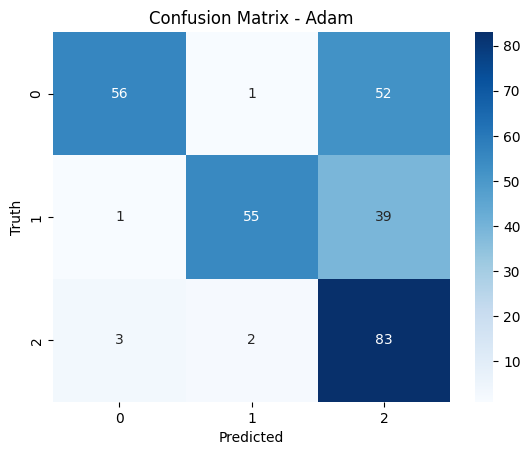

In [18]:
sns.heatmap(confusion_matrix_adam, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Adam')
plt.show()

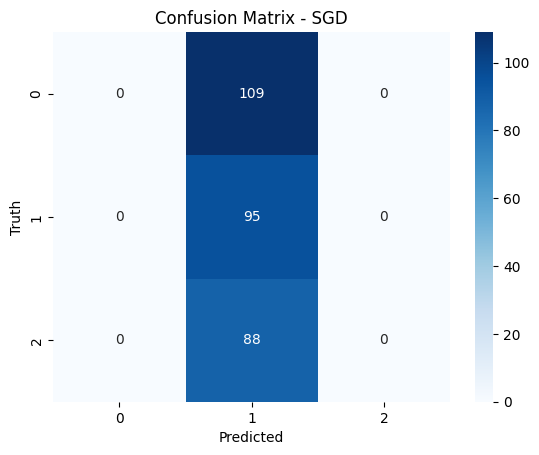

In [19]:
sns.heatmap(confusion_matrix_sgd, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SGD')
plt.show()

## 6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores)

*Explicación *

## 7. Analice si no hay sobreajuste en los modelos.

In [20]:
from sklearn.metrics import classification_report

In [21]:
print("Modelo Adam")
print(classification_report(y_test, y_pred_adam))

Modelo Adam
              precision    recall  f1-score   support

  Economical       0.93      0.51      0.66       109
   Expensive       0.95      0.58      0.72        95
Intermediate       0.48      0.94      0.63        88

    accuracy                           0.66       292
   macro avg       0.79      0.68      0.67       292
weighted avg       0.80      0.66      0.67       292



In [22]:
import warnings
warnings.filterwarnings('ignore')

print("Modelo SGD")
print(classification_report(y_test, y_pred_sgd))

Modelo SGD
              precision    recall  f1-score   support

  Economical       0.00      0.00      0.00       109
   Expensive       0.33      1.00      0.49        95
Intermediate       0.00      0.00      0.00        88

    accuracy                           0.33       292
   macro avg       0.11      0.33      0.16       292
weighted avg       0.11      0.33      0.16       292



No hay _overfitting_ y el desempeño del modelo que implementa SGD deja mucho que desear EXPANDIR RESPUESTAS

## 8. Para el modelo elegido de clasificación (Adam) tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'max_iter': [1000]
}

In [25]:
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5)

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100),
                                                (100, 100, 100, 100)],
                         'max_iter': [1000], 'solver': ['adam']})

In [27]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 1000,
 'solver': 'adam'}

In [28]:
y_pred_adam_tuned = grid_search.predict(X_test)

In [29]:
confusion_matrix_adam_tuned = confusion_matrix(y_test, y_pred_adam_tuned)

<Axes: >

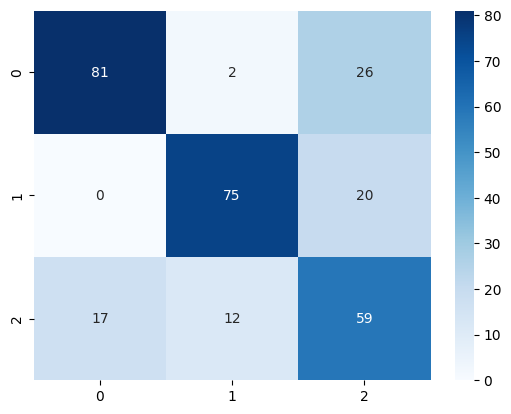

In [30]:
sns.heatmap(confusion_matrix_adam_tuned, annot=True, fmt='d', cmap='Blues')

In [31]:
print("Modelo Adam")
print(classification_report(y_test, y_pred_adam_tuned))

Modelo Adam
              precision    recall  f1-score   support

  Economical       0.83      0.74      0.78       109
   Expensive       0.84      0.79      0.82        95
Intermediate       0.56      0.67      0.61        88

    accuracy                           0.74       292
   macro avg       0.74      0.73      0.74       292
weighted avg       0.75      0.74      0.74       292



## 9. Seleccione ahora el SalesPrice como variable respuesta.

In [32]:
price_df = df.copy()

In [33]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)
y = price_df['SalePrice']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y funciones de activación para predecir el precio de las casas.   

In [35]:
from sklearn.neural_network import MLPRegressor

In [36]:
model_relu = MLPRegressor(
    hidden_layer_sizes=(100, 100), 
    activation='relu',
    max_iter=1000, 
    random_state=42
)

In [37]:
model_relu.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [38]:
model_tanh = MLPRegressor(
    hidden_layer_sizes=(100, 100), 
    activation='tanh',
    max_iter=1000, 
    random_state=42
)

In [39]:
model_tanh.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000,
             random_state=42)

In [40]:
y_pred_relu = model_relu.predict(X_test)

In [41]:
y_pred_tanh = model_tanh.predict(X_test)

### 10.1. Haga una comparación de los resultados obtenidos

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mse_relu = mean_squared_error(y_test, y_pred_relu)
mse_tanh = mean_squared_error(y_test, y_pred_tanh)

In [44]:
print(f"MSE Relu: {mse_relu}")
print(f"MSE Tanh: {mse_tanh}")

MSE Relu: 1433829315.253897
MSE Tanh: 39432842814.58129


## 11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el precio de las casas.

Entre los dos modelos de RNA utilizando las funciones de activación Relu y Tanh para predecir el precio de las casas, el desempeño puede ser claramente diferenciado por sus Métricas de Error Cuadrático Medio (MSE). El modelo con activación Relu presenta un MSE de 1433829315.25, lo cual es significativamente más bajo que el MSE de 39432842814.58 obtenido por el modelo con activación Tanh. Un MSE más bajo indica una menor diferencia entre los valores predichos y los reales, lo que sugiere que el modelo Relu es mucho más preciso en sus predicciones.

En conclusión, basándonos en estas métricas, podemos inciar que el modelo de RNA con activación Relu es claramente superior al modelo con activación Tanh para la tarea de predecir el precio de las casas. Esto sugiere que Relu, al ser una función de activación que permite una mejor propagación del gradiente especialmente en redes profundas, es más efectiva para este tipo de regresión en comparación con Tanh, que podría estar sufriendo de problemas como la saturación de gradientes en contextos donde los valores de entrada varían ampliamente, como es típico en los precios de las casas.

## 12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

In [75]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', max_iter=1000, random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [47]:
train_scores_mean = np.mean(train_scores, axis=1)

In [48]:
train_scores_std = np.std(train_scores, axis=1)

In [49]:
test_scores_mean = np.mean(test_scores, axis=1)

In [50]:
test_scores_std = np.std(test_scores, axis=1)

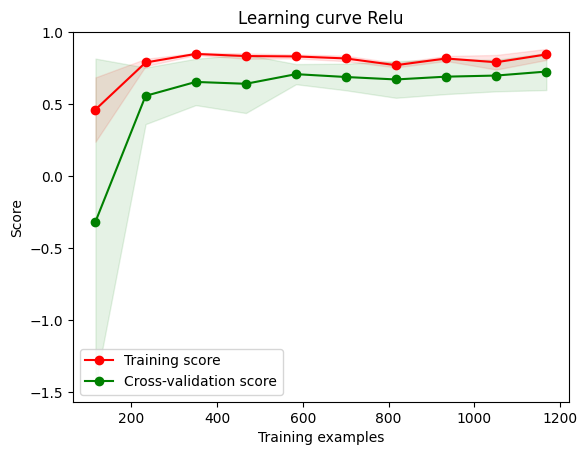

In [51]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve Relu')
plt.legend(loc='best')
plt.show()

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), activation='tanh', max_iter=1000, random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [53]:
train_scores_mean = np.mean(train_scores, axis=1)

In [54]:
train_scores_std = np.std(train_scores, axis=1)

In [55]:
test_scores_mean = np.mean(test_scores, axis=1)

In [56]:
test_scores_std = np.std(test_scores, axis=1)

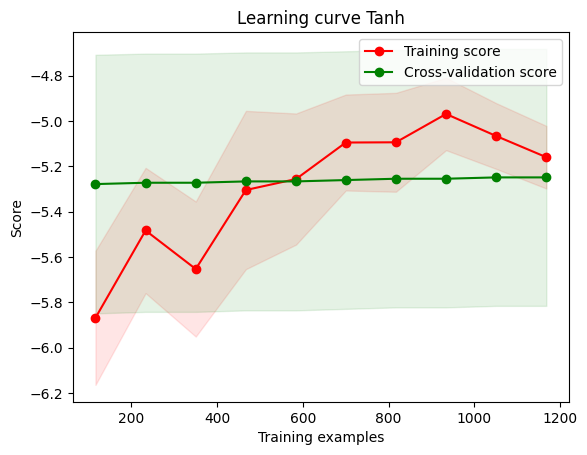

In [57]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve Tanh')
plt.legend(loc='best')
plt.show()

## 13. Para el modelo elegido (Relu) de regresión tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo.

In [58]:
param_grid = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [1000]
}

In [59]:
grid_search = GridSearchCV(MLPRegressor(random_state=42), param_grid, cv=5)

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100),
                                                (100, 100, 100, 100)],
                         'max_iter': [1000], 'solver': ['adam']})

In [61]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 1000,
 'solver': 'adam'}

In [62]:
y_pred_relu_tuned = grid_search.predict(X_test)

In [73]:
mse_relu_tuned = mean_squared_error(y_test, y_pred_relu_tuned)
r2_relu_tuned = r2_score(y_test, y_pred_relu_tuned)

In [74]:
print(f"MSE Relu Tuned: {mse_relu_tuned}")
print(f"R2 Relu Tuned: {r2_relu_tuned}")

MSE Relu Tuned: 1433829315.253897
R2 Relu Tuned: 0.8130680134685284


In [65]:
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', max_iter=1000, random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [66]:
train_scores_mean = np.mean(train_scores, axis=1)

In [67]:
train_scores_std = np.std(train_scores, axis=1)

In [68]:
test_scores_mean = np.mean(test_scores, axis=1)

In [69]:
test_scores_std = np.std(test_scores, axis=1)

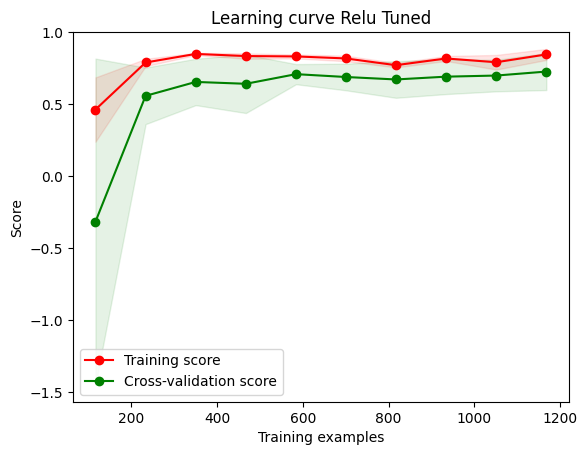

In [70]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve Relu Tuned')
plt.legend(loc='best')
plt.show()

# 14. Compare la eficiencia del mejor modelo de RNA con los resultados obtenidos con los algoritmos de las hojas de trabajo anteriores. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

#### 14.1 Resultados de regresión lineal
![Linear Regression Results](data/LinearRegressionResults.png)

#### 14.2 Resultados de árbol de regresión
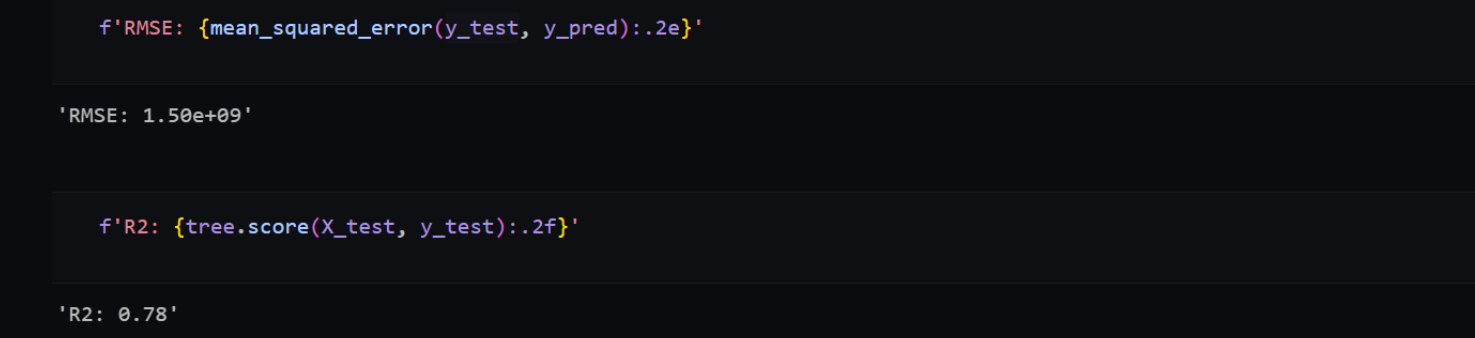

#### 14.3 Resultados de Naive-Bayes
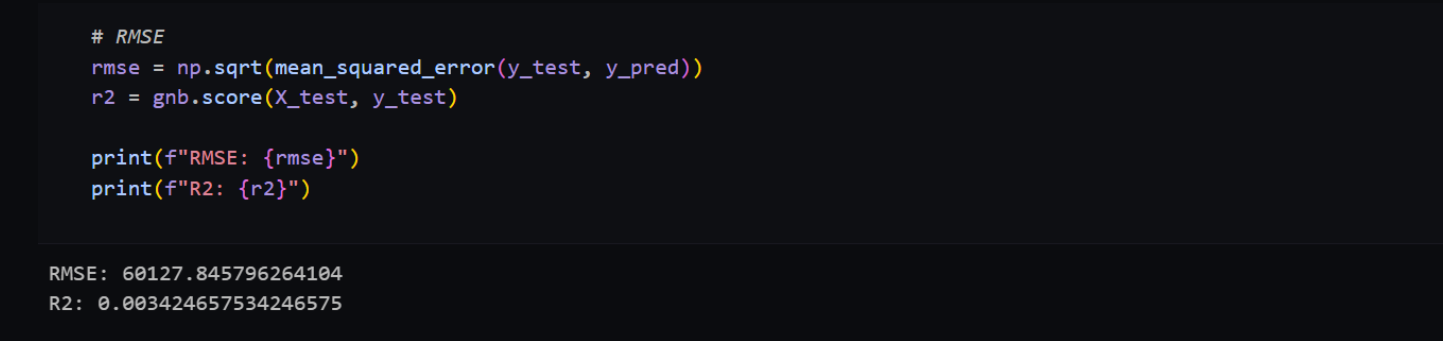

#### 14.4 Resultados de Regresión Logística
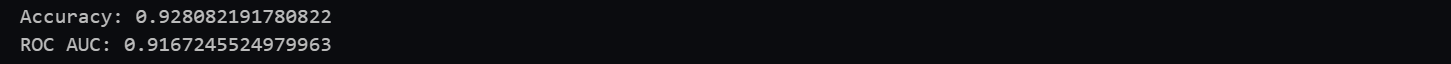

#### 14.5 Resultados de SVM
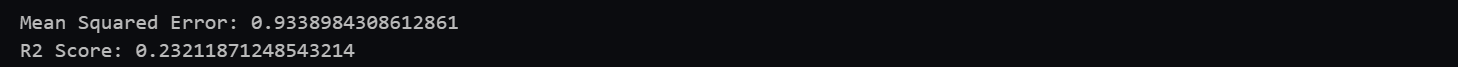

#### Discusión
En la comparación de la eficiencia del mejor modelo de RNA (Relu) contra los otros algoritmos de las hojas de trabajo anteriores (Regresión lineal, Árboles de decisión, Bayes ingenuo, Regresión logística, SVM), se observa que cada modelo presenta ventajas y limitaciones específicas según la métrica y el tipo de tarea (regresión o clasificación). 

Para tareas de regresión, los Árboles de Decisión y la Regresión Lineal destacan por su equilibrio entre tiempo de procesamiento y precisión, con tiempos relativamente cortos (2.6s y 0.4s respectivamente) y buenos valores de R2. En contraste, el modelo de RNA (Relu) ofrece un MSE bajo, indicativo de un buen ajuste, aunque con un tiempo de procesamiento considerablemente mayor (3m 18.6s). 

Para clasificación, la Regresión Logística demuestra ser altamente eficaz con una exactitud del 92.88% y un ROC AUC del 91.67%, aunque también es el que más tiempo consume (casi 5 minutos). En comparación, el modelo de RNA no parece ofrecer ventajas claras en clasificación frente a la Regresión Logística, destacando más en contextos de regresión donde la precisión es crítica a pesar de un mayor tiempo de procesamiento. 

# 15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de los algoritmos usados para clasificar de las hojas de trabajo anteriores


En la evaluación de los modelos para tareas de clasificación, obtenemos que el mejor modelo de RNA (Adam) ofrece una exactitud general del 74%, con una precisión macro promedio y un promedio ponderado similares. Esto lo coloca en un lugar competitivo frente a otros modelos analizados para tareas de clasificación. Comparando con la Regresión Logística, que mostró una exactitud de aproximadamente 92.88% y un ROC AUC de 91.67%, el modelo Adam es menos preciso. Sin embargo, supera a los modelos como el de Bayes Ingenuo, que mostró un mal desempeño en regresión y probablemente también sería limitado en clasificación debido a sus suposiciones de independencia.

La ventaja del modelo Adam en este contexto es su capacidad para manejar no linealidades y relaciones complejas en los datos, aunque esto viene con un costo de tiempo de procesamiento y riesgo de sobreajuste, que debe ser manejado con cuidado. 

En conclusión, mientras que el modelo de RNA (Adam) no alcanza la alta precisión y robustez de la Regresión Logística para clasificación en este caso específico, ofrece una opción viable para contextos donde las relaciones entre variables son más complejas y no lineales, siempre que se puedan afrontar adecuadamente los desafíos de tiempo y sobreajuste.

# 16. Compare los resultados del mejor modelo para predecir el precio de venta con los resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo anteriores


En la comparación del rendimiento de los modelos para predecir el precio de venta, el mejor modelo de RNA (Relu) muestra un MSE de 1433829315, indicando un rendimiento sólido en tareas de regresión. En contraste, la Regresión Lineal presenta un MSE de aproximadamente 1.69168e+09 y un R2 de 0.7572, que, aunque efectivo, sugiere que el RNA puede ser ligeramente más preciso en ajustar los datos. 

Los Árboles de Decisión también son competitivos con un R2 de 0.78, pero con un MSE mayor que el de RNA, indicando un rendimiento un poco inferior en términos de error cuadrático medio. El Bayes Ingenuo y el SVM muestran resultados menos prometedores en esta tarea; Bayes Ingenuo en particular con un R2 cercano a cero, lo cual señala un desempeño pobre en la predicción de precios. La Regresión Logística, siendo un modelo más orientado a la clasificación, no ofrece una comparación directa en términos de MSE o R2. 

En conclusión, para la predicción del precio de venta, el modelo de RNA se destaca por su menor MSE, seguido de cerca por los Árboles de Decisión, mientras que la Regresión Lineal ofrece un balance entre rapidez y eficacia, aunque con un error cuadrático medio más alto.

# 17. Ahora que ha usado todos los modelos que hemos visto y aplicados al conjunto de datos llegue a conclusiones sobre cual es o cuales son los mejores modelos para clasificar dadas las características del conjunto de datos. ¿Cuál o cuáles son los mejores para predecir el precio de las casas? Una tabla de resumen con las métricas de los modelos le puede resultar muy útil para esto

#### Tabla resumen de métricas
![Metrics summary table](data/MetricsSummary.png)

#### Discusión
Al realizar una evaluación exhaustiva de los diferentes modelos aplicados al conjunto de datos de precios de viviendas revela hallazgos significativos sobre su rendimiento en tareas de regresión. El mejor modelo de RNA (Relu) se destaca como el más preciso, alcanzando el mayor valor de R2 (0.81), lo que demuestra su superior capacidad para capturar y modelar la complejidad de los datos. Sin embargo, esta precisión viene a costa de un tiempo de procesamiento considerablemente más largo comparado con otros modelos. 

Por otro lado, los Árboles de Decisión emergen como una opción robusta, ofreciendo un equilibrio entre rapidez y precisión con un R2 de 0.78, lo que los hace adecuados para situaciones donde el tiempo es un factor crítico. Los modelos de SVM y Regresión Logística, aunque rápidos, muestran un rendimiento inferior en la tarea de regresión, lo que los hace menos deseables para este conjunto específico de datos. 

Este análisis destaca la importancia de considerar tanto la precisión como el tiempo de procesamiento al seleccionar un modelo para tareas de predicción en contextos prácticos, destacando la necesidad de equilibrar ambos aspectos según las exigencias del proyecto.

#### Conclusiones
1. Para la clasificación, la Regresión Logística ha demostrado ser muy eficaz.
2. Para la predicción de precios, el RNA, con el mejor R2, se destaca como el modelo más preciso, aunque requiere un tiempo de procesamiento considerablemente mayor.
3. Los Árboles de Decisión ofrecen un buen balance entre velocidad y precisión, siendo una opción recomendable cuando se requiere una ejecución más rápida.
4. La Regresión Logística y SVM pueden no ser las mejores opciones para regresión debido a su bajo R2 en comparación con los modelos mencionados anteriormente.
5. Bayes Ingenuo es muestra como un modelo bastante inadecuado para este tipo de tarea en este conjunto de datos.

# 18. Genere un informe de los resultados y las explicaciones

El documento ser visualizado [acá](https://docs.google.com/document/d/146cj90W9Bmw4PnrzwQgAcJLD6Y0NAms2NxFxJJrs3Ck/edit?usp=sharing)